In [12]:
import os
import pandas as pd
import seaborn as sns

In [13]:
# Global Variables
CURR_DIR_PATH = os.path.dirname(os.path.realpath('__file__'))
file_path = CURR_DIR_PATH + '/Bostader/clean/'
files     = os.listdir(file_path)
df_list   = [] 


In [14]:
for file in files:
    if file.startswith('clean'):
        # print(file_path + file)
        df = pd.read_csv(
            file_path + file,
            index_col  = False,
            engine     = 'python',
            skipfooter = 6)
        df_list.append(df)

In [15]:
big_df = df_list[0]
# big_df.merge(df_list[1], on = 'år', how = 'right')
for df in df_list[1:]:
    if 'år' in df.columns:
        big_df = big_df.merge(df, on = 'år', how = 'left')
    else:
        big_df = big_df.merge(df)
# print(big_df.isna().sum())
big_df = big_df.fillna(0.0)
# dfc = big_df.dropna()
# dfc
big_df.replace('..', 0.0)

,år,Brutto,Netto,Egenanvändning,Genomsnittlig_årshyra_per_kvm_kr,±_Felmarginal_kr
0,1986,140486,135520,4966,298.0,1.0
1,1987,148745,143695,5050,318.0,1.2
2,1988,151294,146174,5120,340.0,1.2
3,1989,155144,150902,4242,366.0,1.4
4,1990,159417,154622,4795,418.0,1.4
5,1991,153609,148656,4953,524.0,2.0
6,1992,155292,150626,4666,568.0,2.0
7,1993,153791,149191,4600,614.0,2.0
8,1994,149718,145069,4649,640.0,2.0
9,1995,156070,151847,4223,658.0,2.0


<AxesSubplot: >

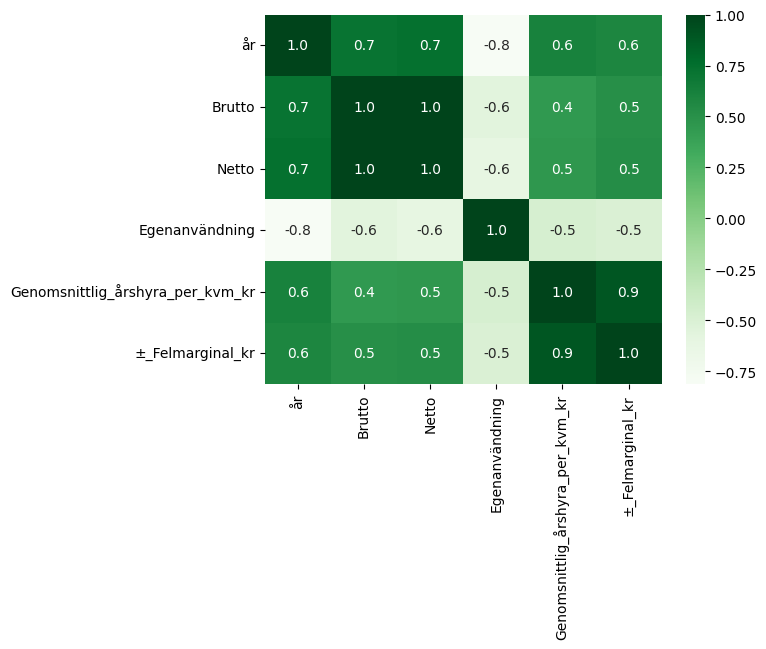

In [16]:
sns.heatmap(big_df.corr(), cmap = "Greens", annot = True, fmt = ".1f")

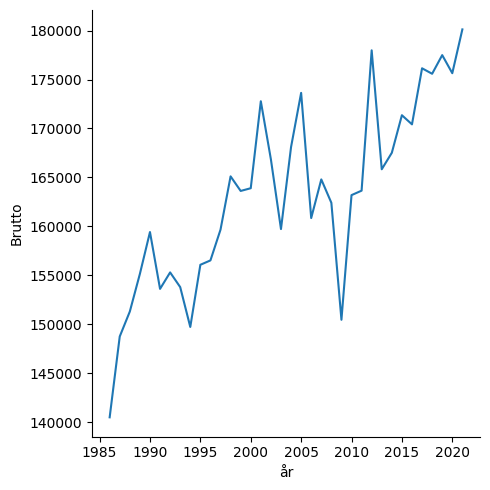

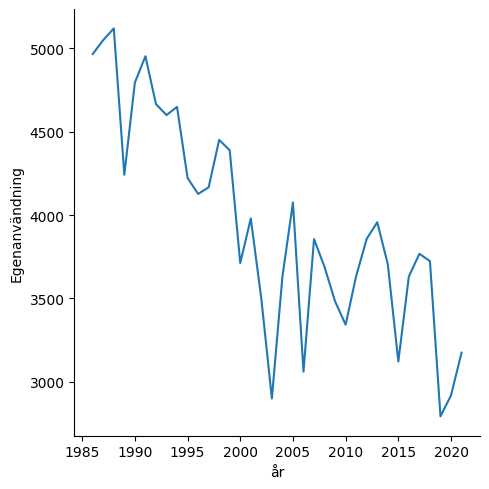

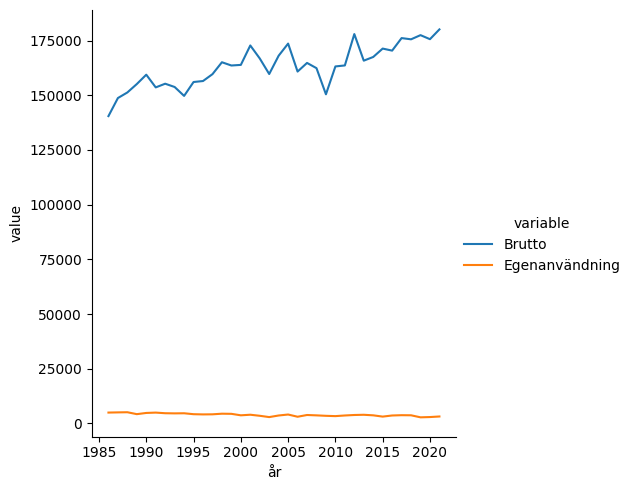

In [35]:
clean_el = CURR_DIR_PATH + '/Bostader/clean/clean_Tillförsel_av_el-energi.csv'

df = pd.read_csv(clean_el)
df_melt = pd.melt(df, ['år'])

sns.relplot(
    data = df, 
    x    = 'år',
    y    = 'Brutto',
    kind = 'line',
    )
sns.relplot(
    data = df, 
    x    = 'år',
    y    = 'Egenanvändning',
    kind = 'line',
    )

dfc = df[['år', 'Brutto', 'Egenanvändning']]
sns.relplot(
    data = pd.melt(dfc, ['år']), 
    x    = 'år',
    y    = 'value',
    hue  = 'variable',
    kind = 'line',
    )